# Projet de classification d’images d’hématies

## Contexte et Importance du Projet

    Le paludisme est une maladie infectieuse grave, transmise par les moustiques, qui touche des millions de personnes chaque année, principalement dans les régions tropicales et subtropicales. 
    
    La détection précoce et précise de cette maladie est cruciale pour le traitement efficace et la réduction de la mortalité. Cependant, le diagnostic repose souvent sur l'examen microscopique des frottis sanguins, une procédure qui peut être longue et nécessitant une expertise médicale spécialisée.


## Objectif du Projet

    L'objectif de ce projet est de développer et d'entraîner un modèle de réseau de neurones convolutifs (CNN) capable de différencier les hématies infectées par le paludisme de celles qui sont saines. 
    
    Un tel modèle pourrait considérablement accélérer le processus de diagnostic et augmenter sa précision, en offrant une assistance automatisée aux professionnels de santé.



# I Manipulation de la Donnée

## 1) Chargement des bibliothèques

In [1]:
# Importation des bibliothèques
import os
import numpy as np
import tensorflow as tf
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pandas as pd

In [3]:
from tqdm import tqdm 

## 2) Charger les données à l'aide de Python

Nous allons utiliser des bibliothèques Python (par exemple, `PIL` ou `opencv`) pour charger les images et leurs labels.


In [4]:
# Chemins des fichiers
path = 'C:/Users/blond/Downloads/malaria_hematie_dataset'

In [5]:
# definir les caracteristiques des images et les sizes
class_names = ['parasitized', 'uninfected']
image_size=(128, 128)

In [6]:
def load_images(path, class_names, image_size):
    images = []
    labels = []
    for label, class_name in tqdm(enumerate(class_names)):
        class_path = os.path.join(path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(class_name)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [7]:
images, labels = load_images(path, class_names, image_size)

2it [00:45, 22.65s/it]


##### Comme on peut le voir, les images ont bien été charegées avec les bonnes structures.
##### En effet, on voit qu'il ya bien 27558 d'images dans mon dataset de size(128,128), RVB

In [8]:
# Verifier la dimension des images
print("Dimension des images:", images.shape)
print("Dimension des labels:", labels.shape)

Dimension des images: (27558, 128, 128, 3)
Dimension des labels: (27558,)


### 2.1 Visualisation des images

In [9]:
import matplotlib.pyplot as plt

In [10]:
def show_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

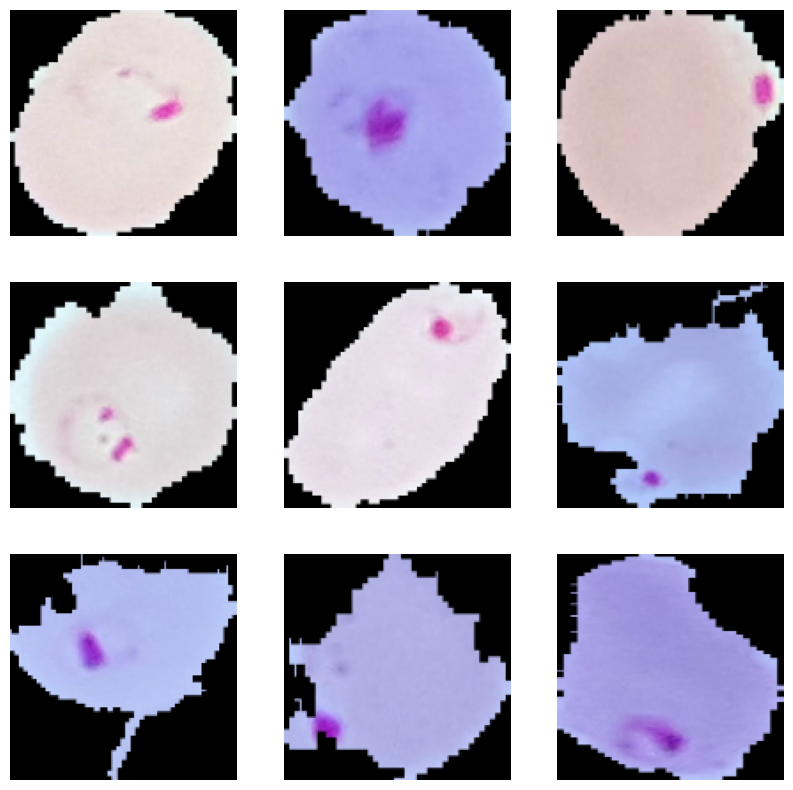

In [11]:
show_images(images, labels, class_names)

### 2.2 Echantillonnage
Cette éetape consiste à sélectionner un sous-ensemble représentatif de données à partir de mon dataset afin de facilité l'analyse de données (éviter le plantage ). En ce sens, on va proceder à la selection d'un échantillon àleatoire.

In [12]:
# Sélectionner un échantillon aléatoire
sample_size = 5000
indices = np.random.choice(len(images), sample_size, replace=False)
images_sample = images[indices]
labels_sample = labels[indices]

In [13]:
# Vérifier la dimension après l'echantillonnage
print("Dimension des images après l'echantillonnage:", images_sample.shape)
print("Dimension des labels après l'echantillonnage:", labels_sample.shape)

Dimension des images après l'echantillonnage: (5000, 128, 128, 3)
Dimension des labels après l'echantillonnage: (5000,)


## 3)  Encoder les labels
Utilisation de LabelEncoder de sklearn pour transformer les labels catégoriels en valeurs numériques.

Cette étape consiste à etiqueter chaque image dans mon jeu de donnée (parasitized, uninfected). Cela revient à créer deux classes contenant les caracteristiques de la maladie.

Parasitized : Correspondant aux images de cellules sanguines infectées par le parasite du paludisme. 

Uninfected : Correspondant aux images de cellules sanguines non infectées

Dans le cas d'une classification binaire(dans notre cas), les labels permettent d'associer chaque image a une classe.

In [14]:
# Encodage des labels
label_encoder = LabelEncoder()
labels_sample_encoded = label_encoder.fit_transform(labels_sample)

In [15]:
num_classes = len(np.unique(labels_sample_encoded))
num_classes

2

In [16]:
labels_sample_encoded

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

## 4) Normalisation des images

Dans cette partie, nous allons normaliser les images pourque les valeurs des pixels soient comprises entre 0 et 1 en les divisant par 255.

Pour cela, on commencera par redimensionner les images, les convertir en tableaux numpy, puis les normaliser en divisant les valeurs des pixels par 255.

Cette étape souvent utilisée en apprentissage automatique est très importante car elle permet d'améliorer la convergence des modèles.

In [17]:
# Split des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(images_sample, labels_sample_encoded, test_size=0.2, random_state=123)

In [18]:
# Split des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images_sample, labels_sample_encoded, test_size=0.2, random_state=123)

In [19]:
# Normalisation
def Normalize_images(images):
    images = images.astype('float32') / 255.0
    return images

In [20]:
# Appliquer la normalisation sur les données echantillonnée
images_normalize= Normalize_images(images)


In [21]:
images_normalize.shape

(27558, 128, 128, 3)

In [22]:
# Appliquer la normalisation sur les données train et test
X_trainNormalize = Normalize_images(X_train)
X_testNormalize = Normalize_images(X_test)
X_valNormalize = Normalize_images(X_val)
y_trainNormalize = Normalize_images(y_train)

In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [24]:
y_val_encoded = label_encoder.transform(y_val)

In [25]:
y_test_encoded = label_encoder.transform(y_test)

In [26]:
y_train_encoded.shape

(4000,)

In [27]:
y_trainNormalize.shape

(4000,)

In [28]:
X_testNormalize.shape

(1000, 128, 128, 3)

In [29]:
X_trainNormalize.shape

(4000, 128, 128, 3)

In [30]:
# Vérifiez la dimension des ensembles d'entraînement et de validation
print("Dimension de X_trainNormalize:", X_trainNormalize.shape)
print("Dimension de X_testNormalize:", X_testNormalize.shape)
print("Dimension de X_valNormalize:", X_valNormalize.shape)
print("Dimension de y_train:", y_train.shape)
print("Dimension de y_test:", y_test.shape)
print("Dimension de y_val:", y_val.shape)

Dimension de X_trainNormalize: (4000, 128, 128, 3)
Dimension de X_testNormalize: (1000, 128, 128, 3)
Dimension de X_valNormalize: (1000, 128, 128, 3)
Dimension de y_train: (4000,)
Dimension de y_test: (1000,)
Dimension de y_val: (1000,)


## 5) Data augmentation
Cette étape consiste à augmenter les données afin de prendre en compte les caracteristiques d'une image.

En effet, nous allons prendre chaque image, et pour chacune plusieurs images augmentées seront générées.

Nous allons donc utiliser ImageDataGenerator de Keras pour appliquer des transformations comme des rotations, des zooms, des flips, etc.

Et en fin, les images et labels augmentés sont fusionnés avec les images et labels originaux pour obtenir un jeu de donnée contenant à la fois les données originales et les données augmentées.

In [31]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

In [32]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)

# Dans le cas où on veut travailler avec les images augmentées
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(X_test, y_test, batch_size=64)


## 6) Caparaison des images initiales VS images après data augmentation

In [33]:
# Fonction pour afficher les images
def Initial_images(image, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

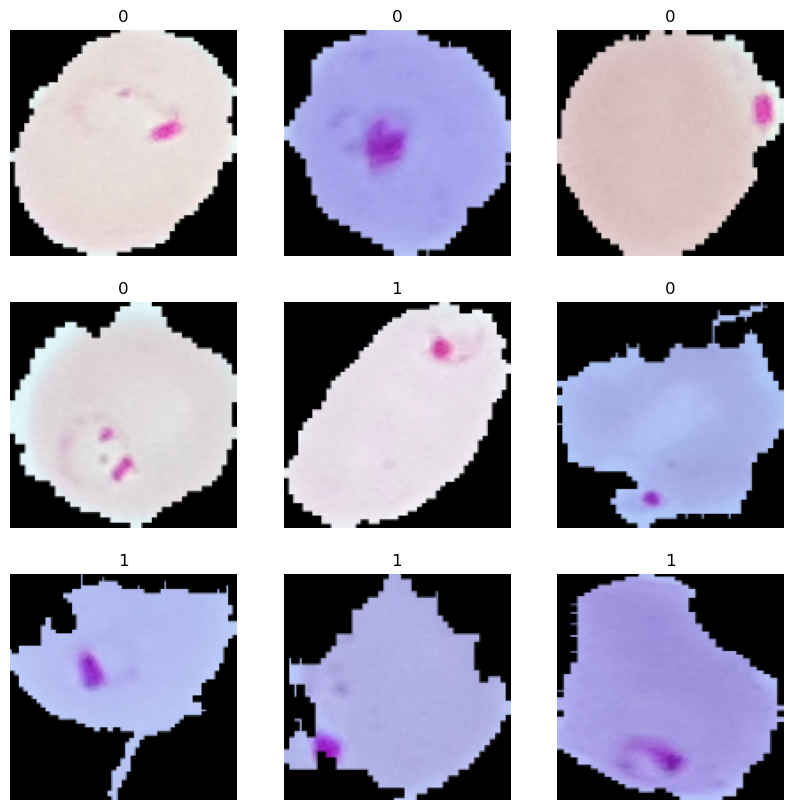

In [34]:
# Visualiser les images originales
Initial_images(X_train, y_train, label_encoder.classes_)

In [35]:
# Fonction pour visualiser les images augmentées
def augmented_images(generator):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img, label = next(generator)
        plt.imshow(img[0])
        plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


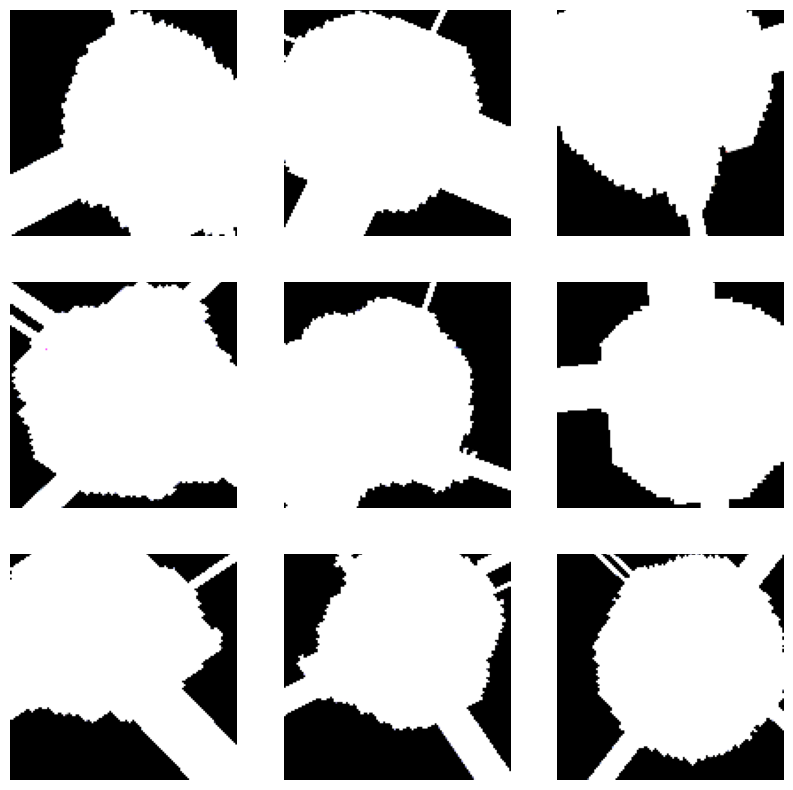

In [36]:
# Visualiser les images augmentées
augmented_images(train_generator)

# II Entraînement de 3 Modèles

## 1) Implémentation de 2 Callbacks

Early Stopping :Permet surveiller la perte de validation (`val_loss`) et arrêter l'entraînement lorsque celle-ci cesse de s'améliorer.

Learning Rate Decay : Proposez une fonction de décroissance pour le taux d'apprentissage. Par exemple, en utilisant  `ReduceLROnPlateau` de Keras, on peut réduire le taux d'apprentissage lorsque la performance cesse de s'améliorer.

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [38]:
# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [39]:
# learning_rate_decay
learning_rate_decay = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

## 2) Implémentation de 3 CNN pour la Labelisation à l'aide de Keras

### 2.1Modèle from scratch avec Sequential : (ps : n’oubliez pas le dropout)


In [40]:
# Modèle from scratch avec Sequential

model_fromscratch = tf.keras.Sequential(
  [
      # Feature learning ~ Encoder
      tf.keras.Input(shape=(128, 128, 3)),
      
      tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
      
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(64, kernel_size=(3, 3),  activation="relu"),
      
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

      # connexion encoder <-> classifier
      tf.keras.layers.Flatten(),
      
      tf.keras.layers.Dropout(0.5),
      

      # Classifier ~ Fully connected
      tf.keras.layers.Dense(1, activation="sigmoid")

  ]
)

In [41]:
model_fromscratch.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          57,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,993 (300.75 KB)

 Trainable params: 76,993 (300.75 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_fromscratch.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Entraînement du modèle
history = model_fromscratch.fit(
    X_trainNormalize, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_data=(X_valNormalize, y_val_encoded),
    callbacks=[learning_rate_decay, early_stopping]
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 450ms/step - accuracy: 0.5315 - loss: 0.7503 - val_accuracy: 0.5030 - val_loss: 0.6865 - learning_rate: 0.0010
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 515ms/step - accuracy: 0.6444 - loss: 0.6333 - val_accuracy: 0.6280 - val_loss: 0.6446 - learning_rate: 0.0010
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 567ms/step - accuracy: 0.6318 - loss: 0.6317 - val_accuracy: 0.6820 - val_loss: 0.6107 - learning_rate: 0.0010
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 553ms/step - accuracy: 0.7216 - loss: 0.5738 - val_accuracy: 0.7480 - val_loss: 0.5432 - learning_rate: 0.0010
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 415ms/step - accuracy: 0.8096 - loss: 0.4850 - val_accuracy: 0.7510 - val_loss: 0.5171 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


In [44]:
import matplotlib.pyplot as plt

### Accuracy traning VS Accuracy testing
    Les sorties ci-dessous permettent voir la precision de notre modèle. En effet, on constate que le modèle est précis à 80%
    soit une accuracy de 0.8090  sur le jeu de donnée d'entrainement, tandis que sur le jeu de test l'accuracy est à 0.7509.
    On peut, donc penser que le est plutot bon dans le'ensemble car sur un jeu de donnée qu'il avait dejà vu il est precis à 80% contre 75%. Je pense qu'on peut ameliorer le modèle en jouant sur les hyperparamètres.
    
    De plus le graphique ci-dessous ne nous permet de conclure sur un eventuel overfiting ou underfiting.

In [45]:
test_loss1, test_acc1 = model_fromscratch.evaluate(X_testNormalize,  y_test_encoded, verbose=2)

32/32 - 4s - 130ms/step - accuracy: 0.7510 - loss: 0.5171


In [46]:
print(test_loss1, test_acc1)

0.5171070098876953 0.7509999871253967


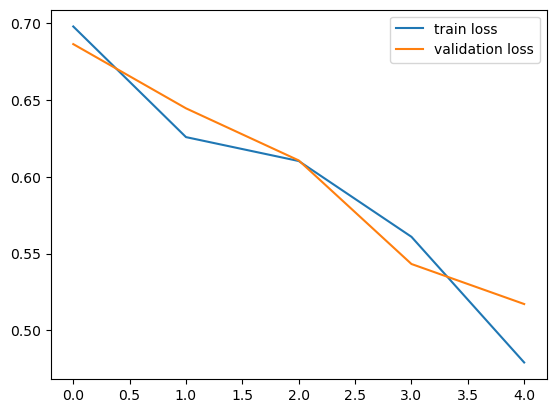

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss', 'validation loss'])
plt.show()

### 2.1.1 Calculer la Matrice de Confusion

Utilisation `confusion_matrix` de `sklearn` pour calculer la matrice de confusion de chaque modèle sur le jeu de test.

    ● Précision = VP /(VP +FN) ou VN/(VN +FP)
    ● Recall = VN/(VN + FN) ou VP/(VP + FP)
    Notre matrice de confusion nous montre que parmis les 487 patients atteints de la maladie, 456 ont été bien classés contre 31 mal clasés. Cela signifie que le modèle a bien pridit 445/ 487 des malades c'est - à- 31 patients atteints de la maladie ont été classés dans la classe non-infecté alors que qu'ils sont infectés. Par ailleurs, on remarque que le modèle a eu du mal a classé les patients non-atteints de la maladie. En effet, sur les 513 patients atteints, seulement 295 ont été bien classés contre 218 mal classés.
    
    En conclusion, on peut dire que le modèle est plutot performant quand il s'agit de predire les patients atteints et mediocre pour classer les patients non-patients. 
    


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
# Predictions sur le dataset test
y_test_encoded_prob1 = model_fromscratch.predict(X_testNormalize)
y_test_pred1 = (y_test_encoded_prob1 > 0.5).astype("int64")

# Calculer la matrice de confusion
conf_matrix1 = confusion_matrix(y_test_encoded, y_test_pred1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step


In [50]:
y_test_encoded_prob1

array([[8.21118280e-02],
       [4.62157279e-03],
       [9.47104216e-01],
       [6.07482970e-01],
       [4.98876840e-01],
       [8.57118726e-01],
       [8.85710239e-01],
       [6.97456002e-01],
       [4.48788106e-01],
       [1.88811094e-01],
       [8.26832056e-01],
       [8.38087559e-01],
       [7.73701847e-01],
       [7.91028023e-01],
       [8.84994626e-01],
       [8.97174478e-01],
       [5.23674428e-01],
       [7.32668042e-01],
       [6.28940940e-01],
       [4.26702589e-01],
       [6.01674199e-01],
       [8.49566400e-01],
       [2.18592614e-01],
       [2.13106885e-03],
       [7.58710146e-01],
       [5.41182637e-01],
       [5.41953683e-01],
       [1.73365951e-01],
       [7.82235205e-01],
       [6.97268009e-01],
       [7.05366880e-02],
       [4.57295448e-01],
       [8.98788929e-01],
       [3.12576264e-01],
       [7.89306611e-02],
       [8.67414296e-01],
       [6.08989596e-01],
       [5.22797585e-01],
       [6.84843957e-01],
       [3.78047079e-01],


In [51]:
conf_matrix1

array([[295, 218],
       [ 31, 456]], dtype=int64)

In [52]:
import seaborn as sns

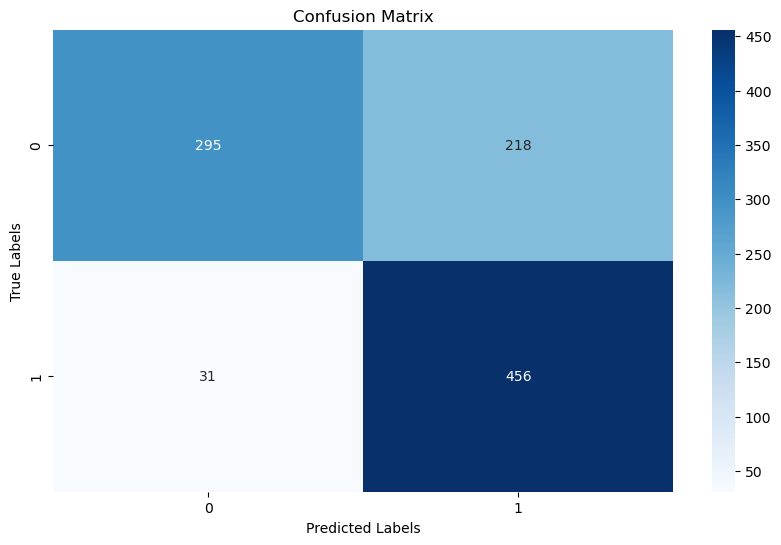

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 2.1.2 Calculer les métriques de performance
Pour chaque modèle, calculez les métriques suivantes en utilisant les fonctions de `sklearn.metrics: 

    accuracy, 
    precision, 
    f1-score, 
    recall, 
    sensibilité et spécificité.

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [55]:
# Calculer des métriques
accuracy1 = accuracy_score(y_test_encoded, y_test_pred1)
precision1 = precision_score(y_test_encoded, y_test_pred1)
recall1 = recall_score(y_test_encoded, y_test_pred1)
f1 = f1_score(y_test_encoded, y_test_pred1)

# Afficher les métriques
print("Accuracy :", accuracy1)
print("Precision :", precision1)
print("Recall :", recall1)
print("F1-Score :", f1)

# Afficher le rapport de classification
print("Rapport de Classification :\n", classification_report(y_test_encoded, y_test_pred1))

Accuracy : 0.751
Precision : 0.6765578635014837
Recall : 0.9363449691991786
F1-Score : 0.7855297157622739
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.90      0.58      0.70       513
           1       0.68      0.94      0.79       487

    accuracy                           0.75      1000
   macro avg       0.79      0.76      0.74      1000
weighted avg       0.79      0.75      0.74      1000



### 2.1.3 Afficher le graphique ROC et calculer l’AUC.
    
    La courbe ROC est un outil graphique souvent utilisée pour évaluer la performance d'un modèle de classification ou encore pour comparer plusieurs modèles.
    
    Elle est le rapport entre la sensibilité et la spécificité. Un bon modèle selon la courbe ROC est donc un compromis entre ses deux paramètres. On a constate que si on veut ameliorer la sensibilité, il faut en contreparti degrader la specificité.
    
    Un modèle parfait serait donc un modèle capable de bien séparer les deux populations. Par exemple, les individus atteints de la maladie ne devraient pas etre classés parmis ceux qui ne sont pas atteints. 
    
    Dans les sorties ci_dessous on remarque que notre modèle CNN a une AUC de 0.86, par consequent on peut donc penser que le modèle classe plutot bien les individus.Pour aller plus loin, il serait interessant d'effectuer un test statistique sur la distribution des deux échantillons.

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

In [57]:
# Calculer la courbe ROC
fpr1, tpr1, thresholds = roc_curve(y_test_encoded, y_test_encoded_prob1)

In [58]:
auc_roc1 = roc_auc_score(y_true=y_test_encoded, y_score=y_test_encoded_prob1)
print(auc_roc1)

0.8574276210718447


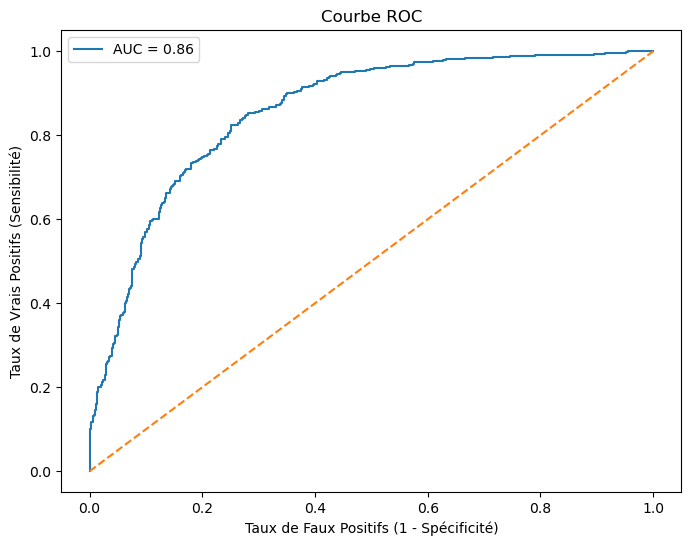

In [59]:
# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'AUC = {auc_roc1:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## 2.2 Fine-tuning du VGG16 pré-entraîné sur ImageNet :

In [60]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [61]:
encodeur_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
encodeur_VGG16.trainable = False

In [62]:
encodeur_VGG16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [63]:
model_VGG16 = Sequential([
    encodeur_VGG16,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [64]:
model_VGG16.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model_VGG16.fit(
    X_trainNormalize, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_data=(X_valNormalize, y_val_encoded),
    callbacks=[early_stopping, learning_rate_decay] 
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 927s 7s/step - accuracy: 0.7515 - loss: 0.4882 - val_accuracy: 0.8790 - val_loss: 0.2948 - learning_rate: 1.0000e-04
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2077s 16s/step - accuracy: 0.9144 - loss: 0.2295 - val_accuracy: 0.9070 - val_loss: 0.2455 - learning_rate: 1.0000e-04
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2171s 17s/step - accuracy: 0.9345 - loss: 0.1862 - val_accuracy: 0.9250 - val_loss: 0.2149 - learning_rate: 1.0000e-04
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 840s 6s/step - accuracy: 0.9432 - loss: 0.1692 - val_accuracy: 0.9120 - val_loss: 0.2331 - learning_rate: 1.0000e-04
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 859s 7s/step - accuracy: 0.9466 - loss: 0.1546 - val_accuracy: 0.9350 - val_loss: 0.2000 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 5.


#### Accuracy traning VS Accuracy testing
    Les sorties ci-dessous permettent de voir la precision de notre modèle. En effet, on constate que le modèle est précis à 95%
    soit une accuracy de 0.9466 sur le jeu de donnée d'entrainement, tandis que sur le jeu de test l'accuracy est à 0.9350. La precision sur les deux jeu de données sont proches, par consequent on peut donc penser qu'il s'agit un bon modèle pour classer les carateristiques de la maladie.

In [66]:
test_loss2, test_acc2 = model_VGG16.evaluate(X_testNormalize,  y_test_encoded, verbose=2)

32/32 - 141s - 4s/step - accuracy: 0.9350 - loss: 0.2000


In [67]:
print(test_loss2, test_acc2)

0.2000313252210617 0.9350000023841858


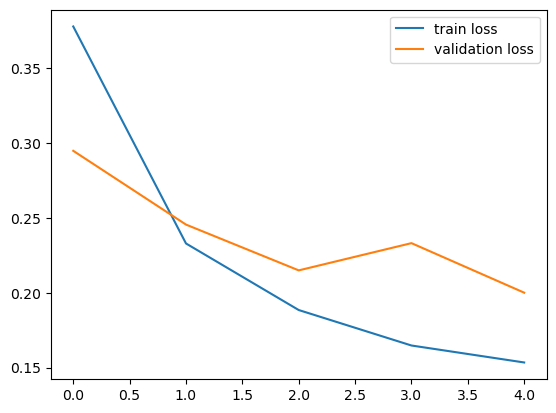

In [68]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss', 'validation loss'])
plt.show()

### 2.2.1 Calculer la Matrice de Confusion
Utilisation `confusion_matrix` de `sklearn` pour calculer la matrice de confusion de chaque modèle sur le jeu de test.

    ● Précision = VP /(VP +FN) ou VN/(VN +FP)
    ● Recall = VN/(VN + FN) ou VP/(VP + FP)
    Notre matrice de confusion nous montre que parmis les 487 patients atteints de la maladie, 468 ont été bien classés contre 19 mal classés. Cela signifie que le modèle a bien pridit 468/ 487 des malades c'est - à- 19 patients atteints de la maladie ont été classés dans la classe non-infecté alors que qu'ils sont infectés. Par ailleurs, on remarque que contrairement au modèle CNN le VGG16 classe plutôt bien les patients non-atteints de la maladie. En effet, sur les 513 patients non-atteints, seulement 46 ont été bien mal classés contre 467 bien classés.

    En conclusion, on peut dire que le modèle n'est certes pas parfait mais il arrive à bien predir les patients.

In [69]:
# Predictions sur le dataset test
y_test_encoded_prob2 = model_VGG16.predict(X_testNormalize)
y_test_pred2 = (y_test_encoded_prob2 > 0.5).astype("int64")

32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step


In [70]:
y_test_encoded_prob2

array([[4.05627191e-02],
       [3.25859059e-04],
       [9.93061602e-01],
       [5.00663877e-01],
       [9.24926877e-01],
       [7.92460367e-02],
       [9.73112583e-01],
       [2.11636573e-02],
       [1.91144223e-04],
       [5.76752973e-05],
       [9.87365305e-01],
       [5.96178137e-02],
       [9.43593681e-01],
       [9.68595743e-01],
       [8.81014109e-01],
       [9.72392976e-01],
       [2.47634132e-03],
       [9.61677432e-01],
       [1.30356893e-01],
       [2.25937620e-01],
       [1.27900828e-04],
       [6.27902091e-01],
       [1.06785595e-02],
       [4.52904624e-06],
       [9.86447394e-01],
       [2.69877374e-01],
       [1.15980513e-01],
       [2.24365424e-02],
       [6.81079745e-01],
       [1.12926431e-01],
       [6.11626863e-01],
       [5.03834337e-03],
       [9.79520142e-01],
       [1.58971676e-03],
       [1.97573192e-03],
       [9.57504690e-01],
       [4.93423432e-01],
       [6.37494028e-01],
       [8.51311814e-03],
       [1.57513693e-02],


In [71]:
# Calculer la matrice de confusion
conf_matrix2 = confusion_matrix(y_test_encoded, y_test_pred2)

In [72]:
conf_matrix2

array([[467,  46],
       [ 19, 468]], dtype=int64)

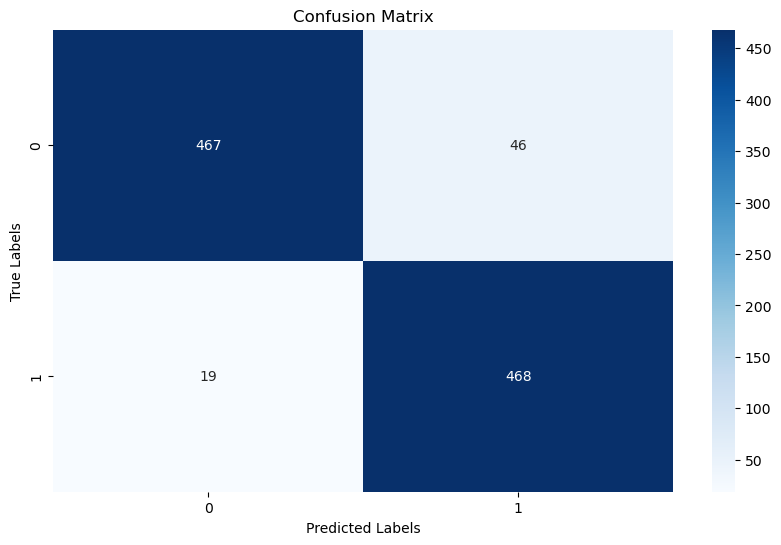

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 2.2.2 Calculer les métriques de performance
Pour chaque modèle, calculez les métriques suivantes en utilisant les fonctions de `sklearn.metrics:

    accuracy, 
    precision, 
    f1-score, 
    recall, 
    sensibilité et spécificité.

In [75]:
# Calculer des métriques
accuracy2 = accuracy_score(y_test_encoded, y_test_pred2)
precision2 = precision_score(y_test_encoded, y_test_pred2)
recall2 = recall_score(y_test_encoded, y_test_pred2)
f1 = f1_score(y_test_encoded, y_test_pred2)

# Afficher les métriques
print("Accuracy :", accuracy2)
print("Precision :", precision2)
print("Recall :", recall2)
print("F1-Score :", f1)

# Afficher le rapport de classification
print("Rapport de Classification :\n", classification_report(y_test_encoded, y_test_pred2))

Accuracy : 0.935
Precision : 0.9105058365758755
Recall : 0.9609856262833676
F1-Score : 0.9350649350649349
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       513
           1       0.91      0.96      0.94       487

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.93      1000
weighted avg       0.94      0.94      0.93      1000



### 2.2.3 Afficher le graphique ROC et calculer l’AUC

    On a une courbe ROC de 0.98, cela siginie que le modèle arrive plutôt bien à predir chaque patient dans la classe il appartient (malade ou saine)

In [76]:
# Calculer la courbe ROC
fpr2, tpr2, thresholds = roc_curve(y_test_encoded, y_test_encoded_prob2)

In [77]:
auc_roc2 = roc_auc_score(y_true=y_test_encoded, y_score=y_test_encoded_prob2)
print(auc_roc2)

0.9759197217318907


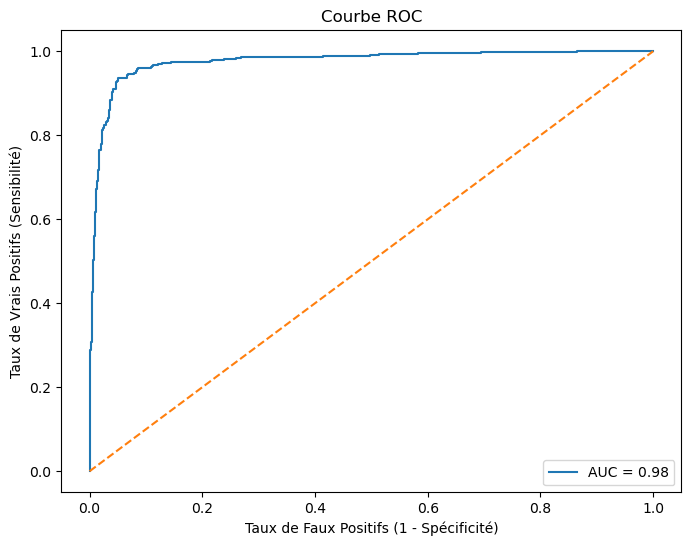

In [78]:
# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label=f'AUC = {auc_roc2:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# 2.3 Fine-tuning du ResNet50 pré-entraîné sur ImageNet

In [81]:
encodeur_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
encodeur_ResNet50.trainable = False

In [82]:
encodeur_ResNet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 134, 134, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 64, 64, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 64, 64, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 64, 64, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 66, 66, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 32, 32, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 32, 32, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 32, 32, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 32, 32, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 32, 32, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 32, 32, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [83]:
model_ResNet50 = Sequential([
    encodeur_ResNet50,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [84]:
model_ResNet50.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
history = model_ResNet50.fit(
    X_trainNormalize, y_train_encoded,
    epochs=5,
    batch_size=32,
    validation_data=(X_valNormalize, y_val_encoded),
    callbacks=[early_stopping, learning_rate_decay] 
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.5750 - loss: 0.6821 - val_accuracy: 0.6550 - val_loss: 0.6292 - learning_rate: 1.0000e-04
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 171s 916ms/step - accuracy: 0.6441 - loss: 0.6269 - val_accuracy: 0.6670 - val_loss: 0.6200 - learning_rate: 1.0000e-04
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.6645 - loss: 0.6112 - val_accuracy: 0.6550 - val_loss: 0.6357 - learning_rate: 1.0000e-04
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.6756 - loss: 0.5943 - val_accuracy: 0.6740 - val_loss: 0.6065 - learning_rate: 1.0000e-04
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.6854 - loss: 0.5994 - val_accuracy: 0.6620 - val_loss: 0.6127 - learning_rate: 1.0000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


#### Accuracy traning VS Accuracy testing

In [86]:
test_loss3, test_acc3 = model_ResNet50.evaluate(X_testNormalize,  y_test_encoded, verbose=2)

32/32 - 53s - 2s/step - accuracy: 0.6550 - loss: 0.6292


In [87]:
print(test_loss3, test_acc3)

0.6292138695716858 0.6549999713897705


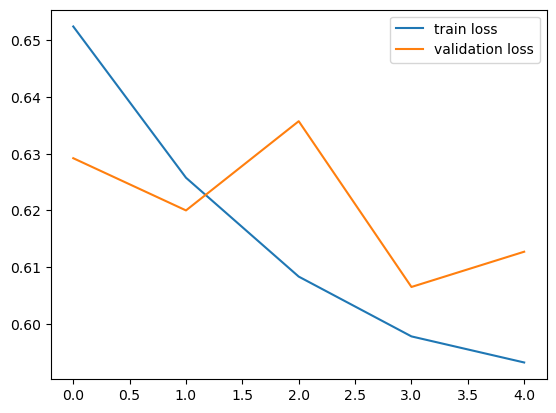

In [88]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss', 'validation loss'])
plt.show()

### 2.2.1 Calculer la Matrice de Confusion
    Utilisation confusion_matrix de sklearn pour calculer la matrice de confusion de chaque modèle sur le jeu de test.

    Notre matrice de confusion nous montre que parmis les 494 patients atteints de la maladie, seulement 373 ont été bien classés contre 121 mal clasés. Cela signifie que le modèle a bien pridit 373/494 des malades c'est - à- 121 patients atteints de la maladie ont été classés dans la classe non-infecté alors que qu'ils sont infectés.

In [89]:
# Predictions sur le dataset test
y_test_encoded_prob3 = model_ResNet50.predict(X_testNormalize)
y_test_pred3 = (y_test_encoded_prob3 > 0.5).astype("int64")

32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step


In [90]:
y_test_encoded_prob3

array([[0.26857343],
       [0.432045  ],
       [0.8141221 ],
       [0.38634518],
       [0.53721297],
       [0.68585503],
       [0.8071161 ],
       [0.35464627],
       [0.44281778],
       [0.66205555],
       [0.68414146],
       [0.6627937 ],
       [0.61751187],
       [0.57924175],
       [0.7294977 ],
       [0.47297752],
       [0.37954363],
       [0.6786296 ],
       [0.38778332],
       [0.4959931 ],
       [0.52313745],
       [0.31180117],
       [0.26956618],
       [0.27642313],
       [0.65686303],
       [0.39322755],
       [0.7163136 ],
       [0.44323215],
       [0.5058267 ],
       [0.45861122],
       [0.62024593],
       [0.69627714],
       [0.4136198 ],
       [0.49731106],
       [0.56872964],
       [0.6766549 ],
       [0.30636576],
       [0.36610186],
       [0.31894067],
       [0.59316707],
       [0.6332989 ],
       [0.858044  ],
       [0.5046978 ],
       [0.7771058 ],
       [0.31703392],
       [0.21313554],
       [0.4913528 ],
       [0.733

In [91]:
# Calculer la matrice de confusion
conf_matrix3 = confusion_matrix(y_test_encoded, y_test_pred3)

In [92]:
conf_matrix3

array([[314, 199],
       [146, 341]], dtype=int64)

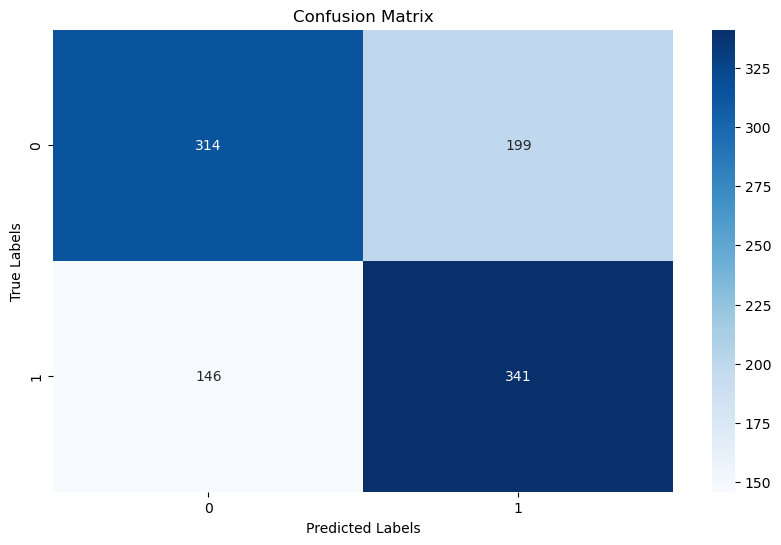

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 2.2.2 Calculer les métriques de performance

    accuracy, 
    precision, 
    f1-score, 
    recall, 
    sensibilité et spécificité.

In [94]:
# Calculer des métriques
accuracy3 = accuracy_score(y_test_encoded, y_test_pred3)
precision3 = precision_score(y_test_encoded, y_test_pred3)
recall3 = recall_score(y_test_encoded, y_test_pred3)
f1 = f1_score(y_test_encoded, y_test_pred3)

# Afficher les métriques
print("Accuracy :", accuracy3)
print("Precision :", precision3)
print("Recall :", recall3)
print("F1-Score :", f1)

# Afficher le rapport de classification
print("Rapport de Classification :\n", classification_report(y_test_encoded, y_test_pred3))

Accuracy : 0.655
Precision : 0.6314814814814815
Recall : 0.7002053388090349
F1-Score : 0.6640701071080819
Rapport de Classification :
               precision    recall  f1-score   support

           0       0.68      0.61      0.65       513
           1       0.63      0.70      0.66       487

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.66      0.66      0.65      1000



### 2.2.3 Afficher le graphique ROC et calculer l’AUC

    Ici, on a une courbe ROC de 0.71
    On voit que la courbe se rapproche de la bisectrice, ce qui nous donne permet de statuer sur la performance du modèle.

In [95]:
# Calculer la courbe ROC
fpr3, tpr3, thresholds = roc_curve(y_test_encoded, y_test_encoded_prob3)

In [96]:
auc_roc3 = roc_auc_score(y_true=y_test_encoded, y_score=y_test_encoded_prob3)
print(auc_roc3)

0.7078825285893264


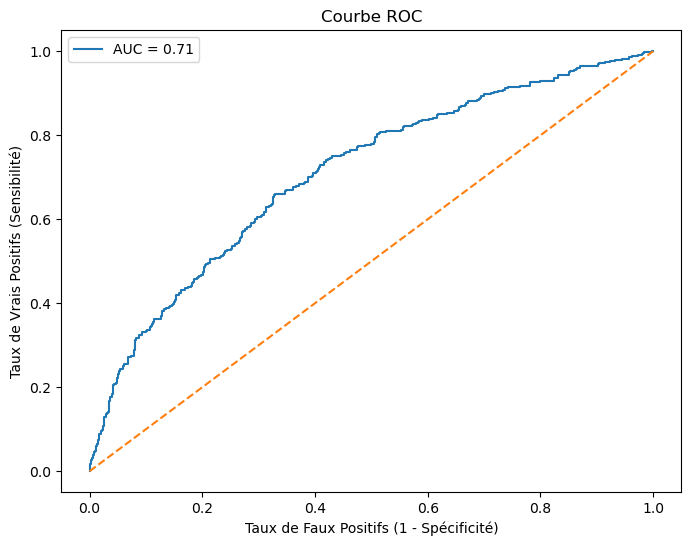

In [97]:
# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, label=f'AUC = {auc_roc3:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# 4) Sauvegarder les poids des 3 différents modèles
Utilisez `model.save_weights` pour sauvegarder les poids des modèles entraînés.


In [98]:
path = 'C:/Users/blond/Downloads/malaria_hematie_dataset.weights.h5'

In [99]:
# Sauvegarde des poids du modèle personnalisé
model_fromscratch.save_weights(path)

In [100]:
model_VGG16.save_weights(path)

In [101]:
model_ResNet50.save_weights(path)


# 5) Comparaison des modèles


    ROC_model_fromscratch = 0.86
    ROC_model_VGG16       = 0.98
    ROC_model_ResNet50    = 0.71

La courbe ROC est un outil graphique souvent utilisée pour évaluer la performance d'un modèle de classification ou encore pour comparer plusieurs modèles.

Elle est le rapport entre la sensibilité et la spécificité. Un bon modèle selon la courbe ROC est donc un compromis entre ses deux paramètres. On a constate que si on veut ameliorer la sensibilité, il faut en contreparti degrader la specificité.

Un modèle parfait serait donc un modèle capable de bien séparer les deux populations. Par exemple, les individus atteints de la maladie ne devraient pas etre classés parmis ceux qui ne sont pas atteints. 

Les trois classifiers ci-dessus ont respectivement une 0.86 , 0.98 , 0.71. Par consequent, on peut donc penser que le meilleur classifier permettant de classer les caracteristiques de la maladie (palludisme) est bien le VGG16 avec une ROC de 0.98